In [1]:
import numpy as np
import pandas as pd
import nltk
  
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
plt.style.use('dark_background')

In [2]:
data = np.load('sentences_embedding/word_embedding.npy')

In [3]:
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(44996, 200)


In [4]:
pca = PCA(n_components=10)
data_pca = pca.fit_transform(data)

In [5]:
print(type(data_pca))
print(data_pca.shape)
print(len(data_pca[0]))

<class 'numpy.ndarray'>
(44996, 10)
10


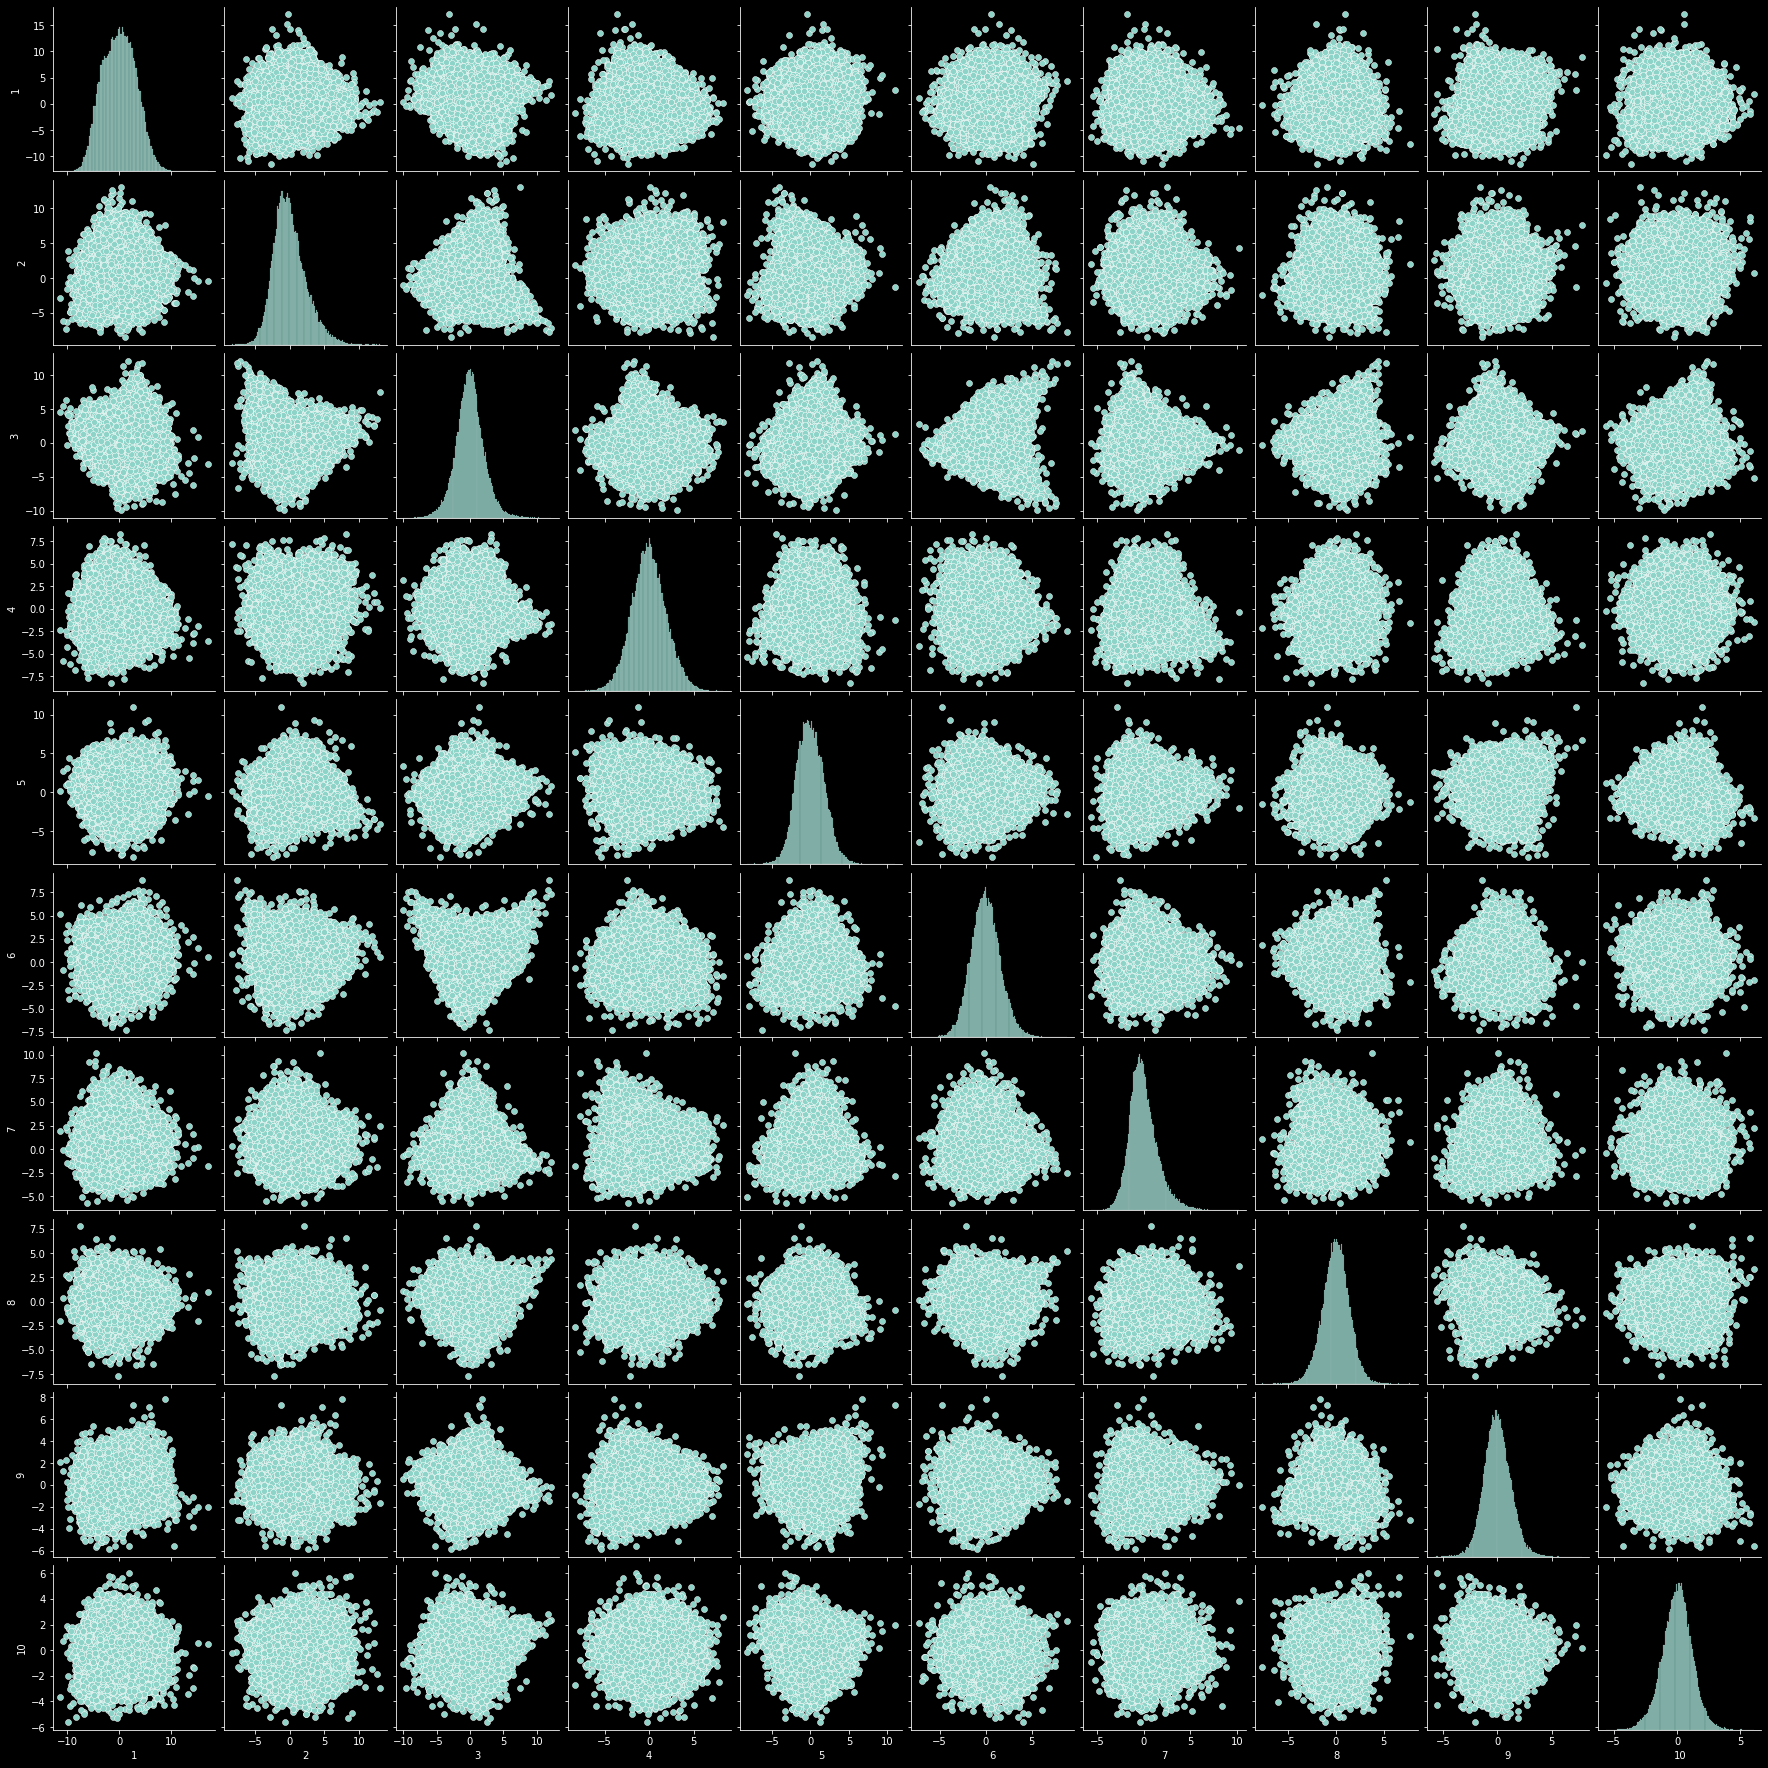

In [6]:
columns = [str(i+1) for i in range(len(data_pca[0]))] #Name of columns: '1', '2', '3', etc
data_frame = pd.DataFrame(data_pca)
data_frame.columns = columns
sns.pairplot(data_frame)

In [7]:
#parallel_coordinates(data_frame, class_column = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k'], alpha = 0.3)

In [8]:
kmeans5 = KMeans(n_clusters = 2, random_state =0).fit(data)
clusters5 = kmeans5.labels_ # list with one value per text corresponding to the cluster label

kmeans10 = KMeans(n_clusters = 5, random_state =0).fit(data)
clusters10 = kmeans10.labels_

kmeans15 = KMeans(n_clusters = 8, random_state =0).fit(data)
clusters15 = kmeans15.labels_

kmeans20 = KMeans(n_clusters = 12, random_state =0).fit(data)
clusters20 = kmeans20.labels_

In [9]:
print(clusters5)
print(clusters5.shape)

[1 1 0 ... 0 0 0]
(44996,)


In [10]:
xpl = pca.explained_variance_ratio_  #Porcentage of the data described by the corresponding vector
print(xpl[:5]) #Porcentage of data described by each of the first 5 vectors
print(np.sum(xpl)) #Total porcentage of data describe by all the vector components

[0.15668371 0.08476929 0.06869249 0.05748022 0.0495441 ]
0.56797713


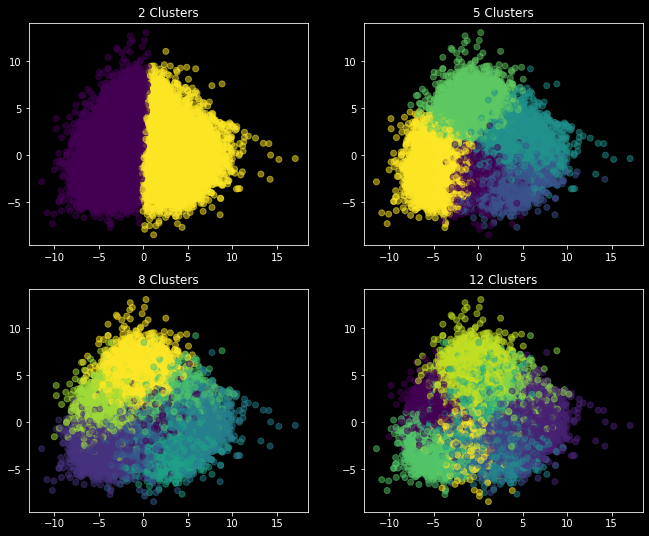

In [11]:
# Exploring with different numbers of clusters
plt.figure(figsize=(11,9))

plt.subplot(2,2,1)
plt.title('2 Clusters')
plt.scatter(data_pca[:,0], data_pca[:,1], c=clusters5, alpha=0.5)

plt.subplot(2,2,2)
plt.title('5 Clusters')
plt.scatter(data_pca[:,0], data_pca[:,1], c=clusters10, alpha=0.5)

plt.subplot(2,2,3)
plt.title('8 Clusters')
plt.scatter(data_pca[:,0], data_pca[:,1], c=clusters15, alpha=0.5)

plt.subplot(2,2,4)
plt.title('12 Clusters')
plt.scatter(data_pca[:,0], data_pca[:,1], c=clusters20, alpha=0.5)

plt.show()

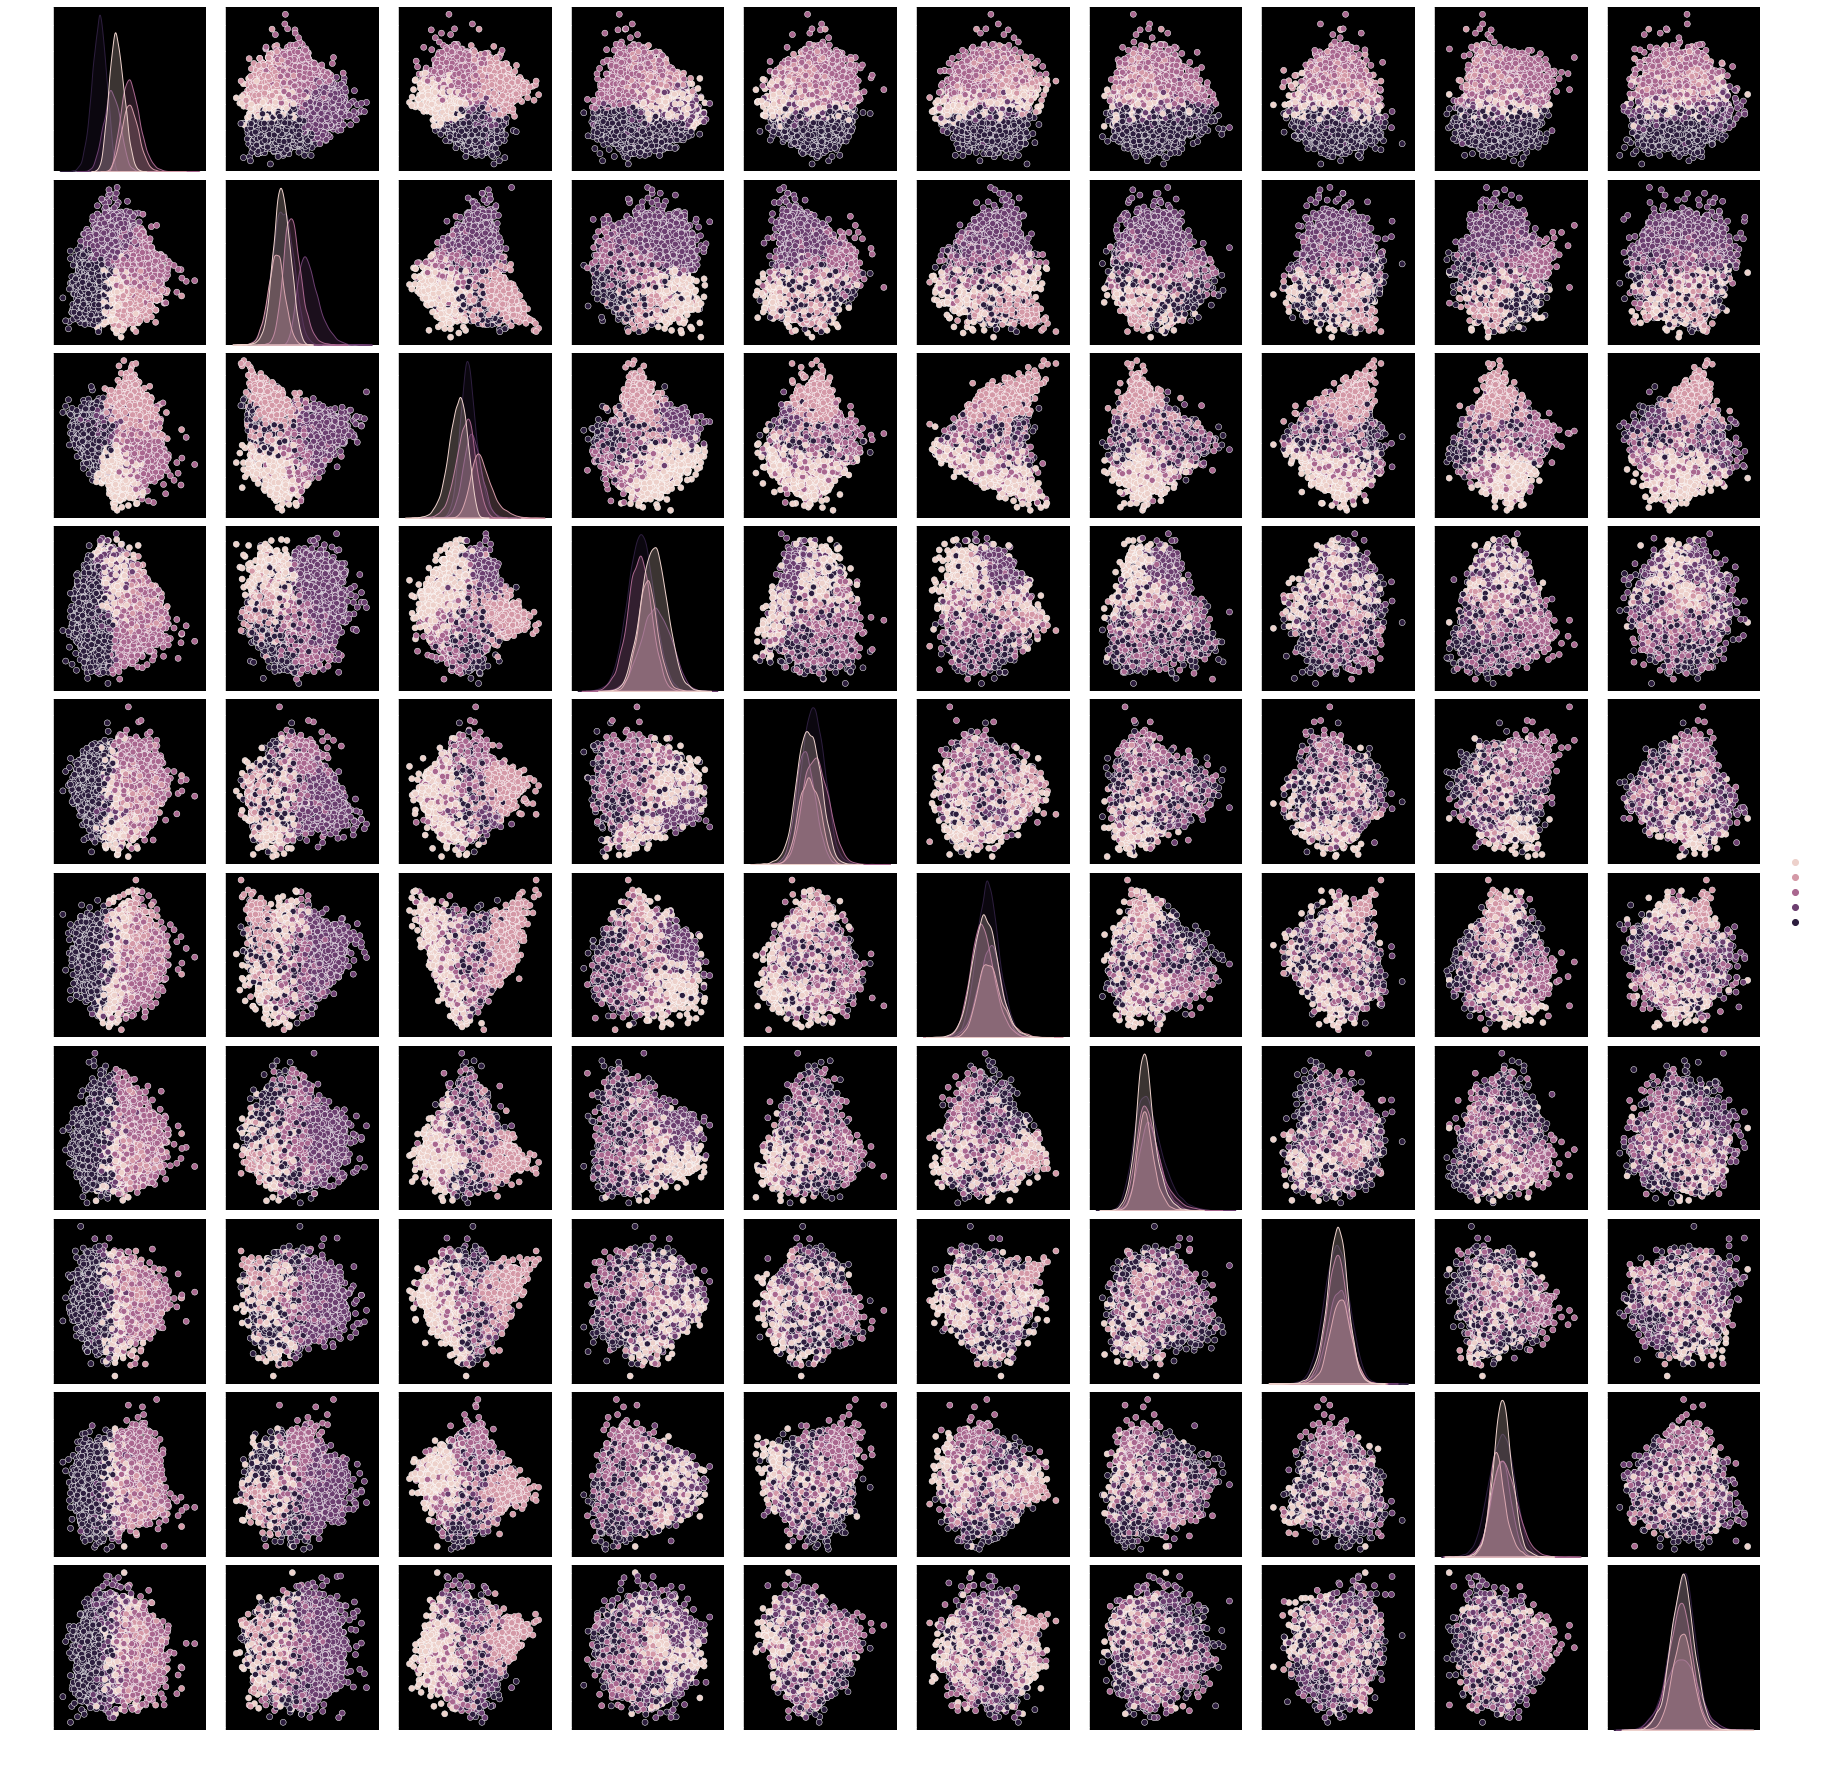

In [12]:
data_frame['c'] = clusters10
%matplotlib inline
sns.pairplot(data_frame, hue = 'c')

<IPython.core.display.Javascript object>


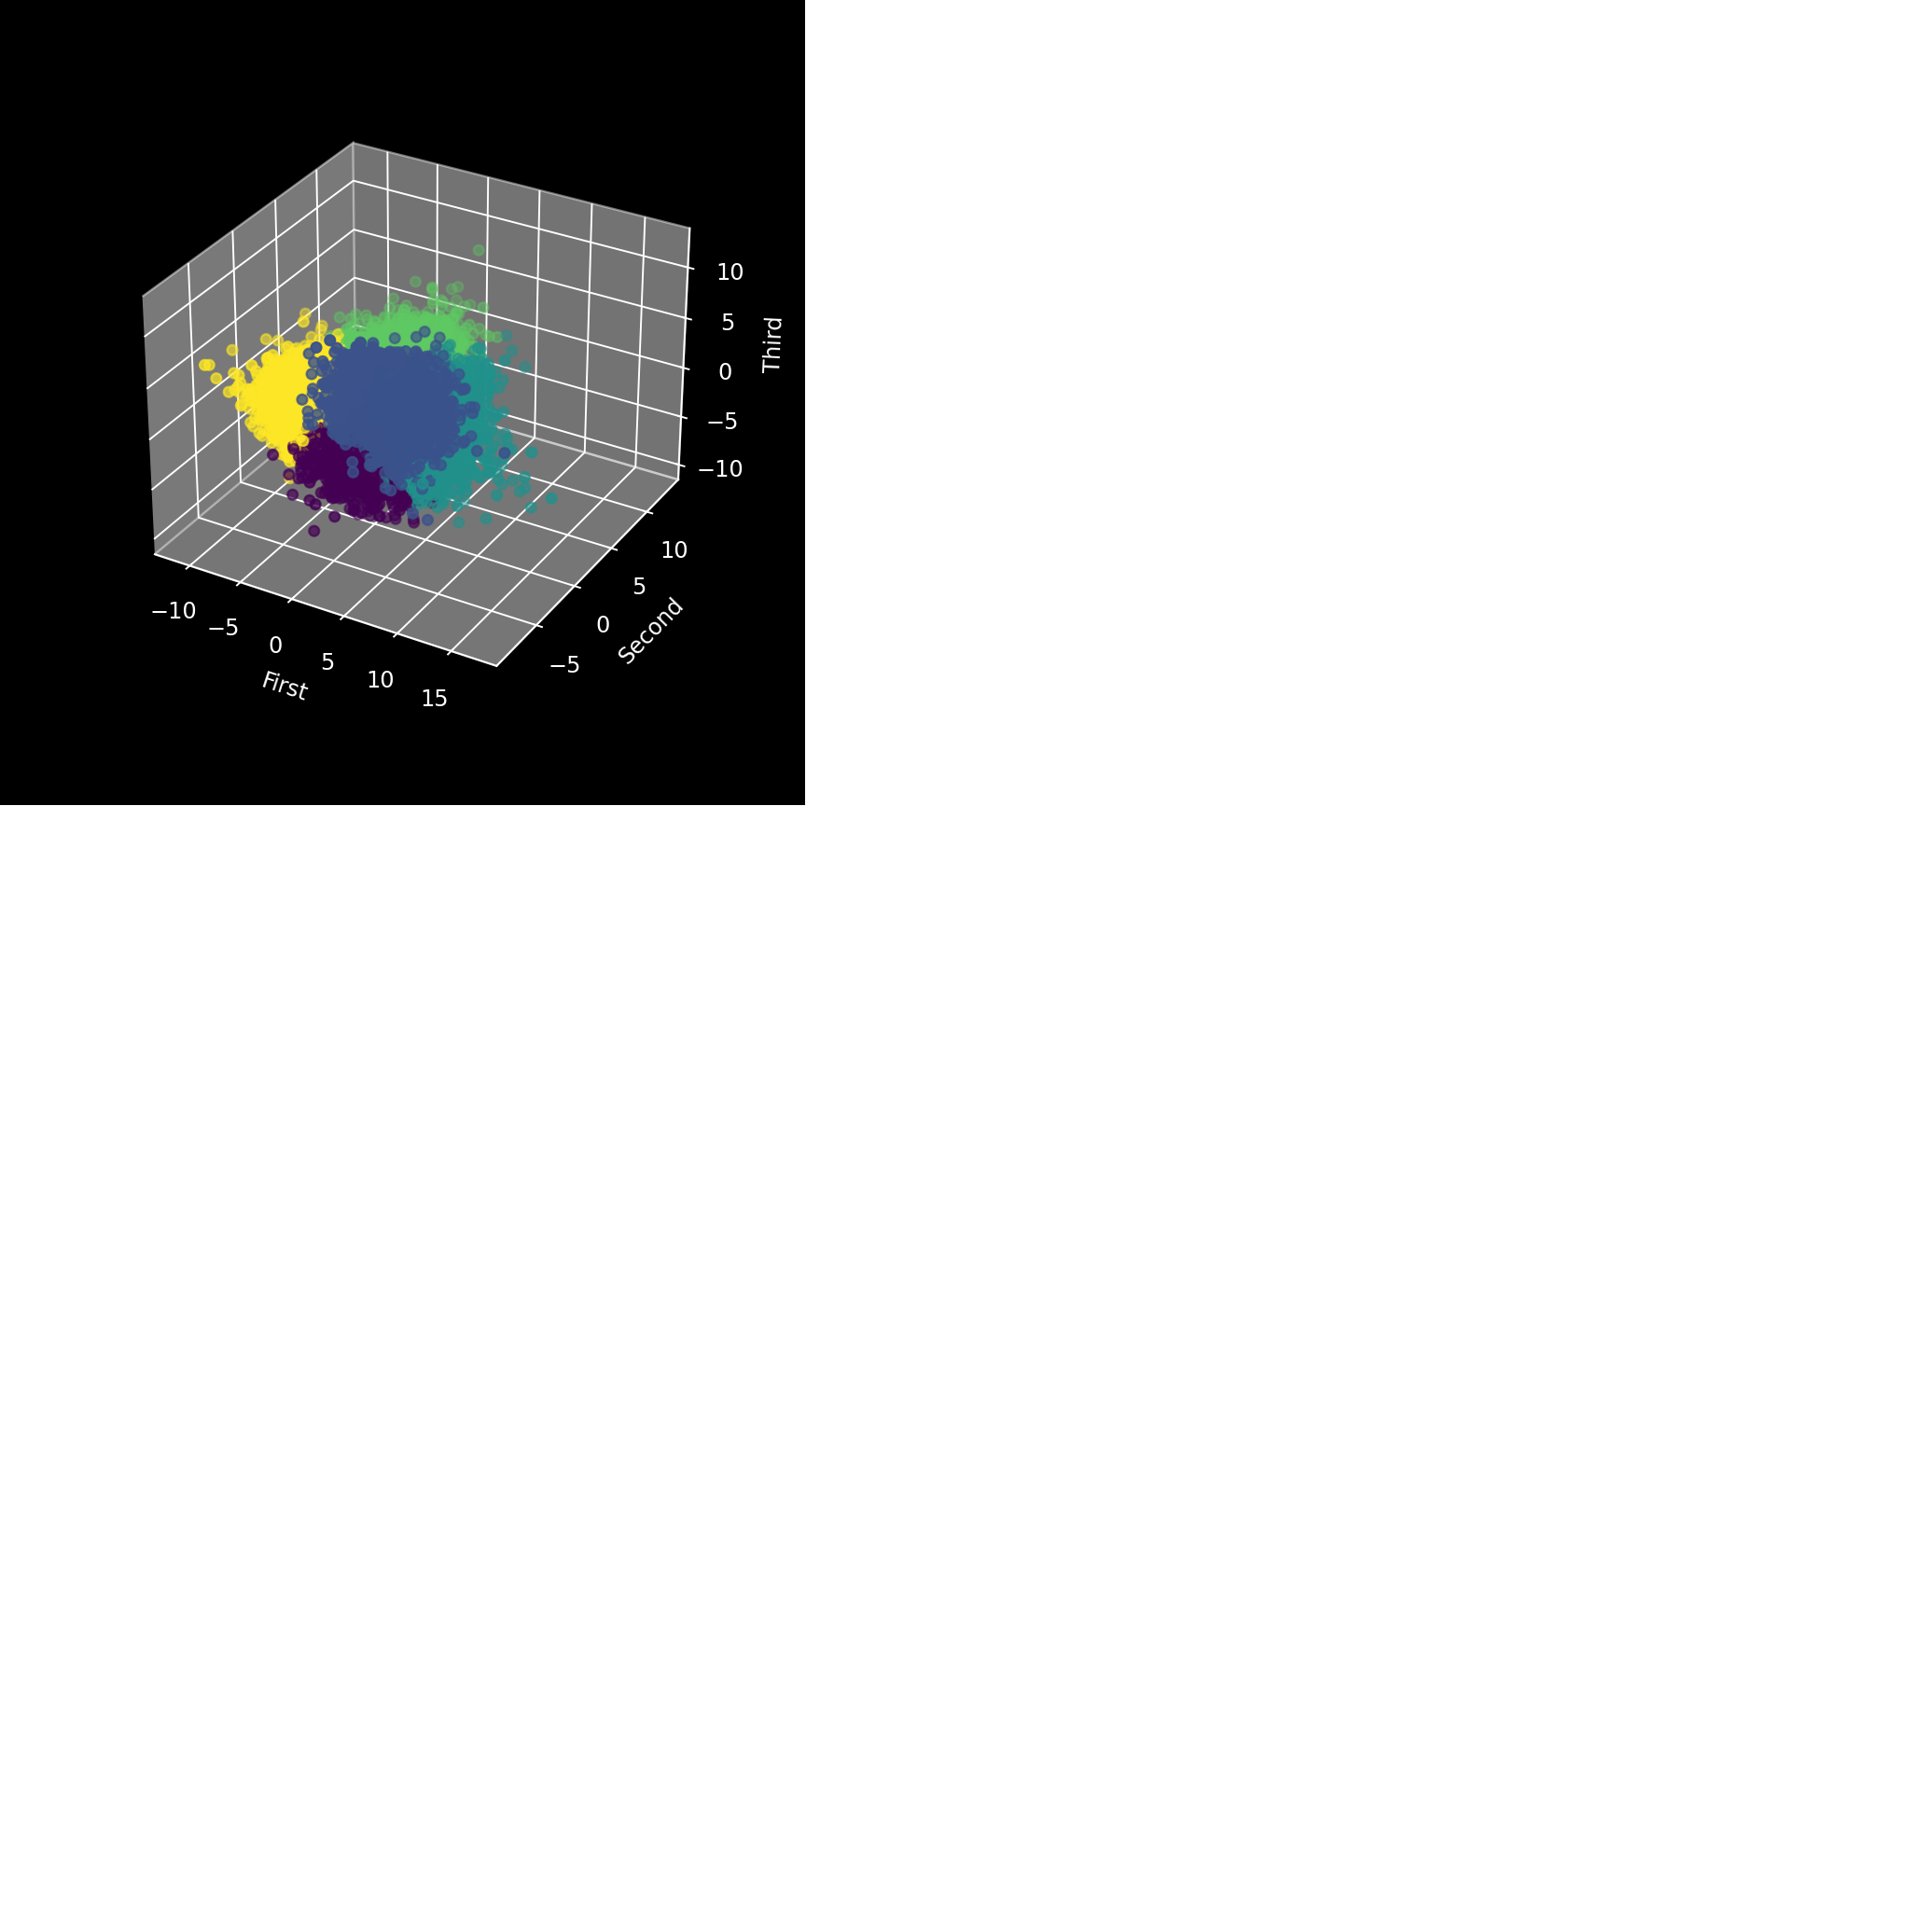

Text(0.5, 0, 'Third')

In [14]:
#3d plot of the 3 main components
%matplotlib notebook
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(projection='3d')
ax.scatter(data_pca[:,0], data_pca[:,1], data_pca[:,2], c=clusters10)

ax.set_xlabel('First')
ax.set_ylabel('Second')
ax.set_zlabel('Third')

#plt.show()

## Por hacer:
Sacar los indices de cada grupo para recuperar de los datos -> Word cloud para cada cluster!

## Presentacion: 
Descripcion (analisis no supervisado), algoritmos (metodos y teoria), resultados (PCA porcentages vs cluster, y word cloud)